In [1]:
import feature_maps as fm
import torch
import os
import torchvision.transforms as transforms
from PIL import Image
from matplotlib import pyplot as plt 
import numpy as np

In [2]:
device=torch.device("cuda")
feature_encoder = fm.CNNEncoder()
feature_encoder.cuda(device)

if os.path.exists(str("./models/miniimagenet_feature_encoder_5way_1shot.pkl")):
        feature_encoder.load_state_dict(torch.load(str("./models/miniimagenet_feature_encoder_5way_1shot.pkl"),map_location='cuda:0'))
        print("load feature encoder success")


load feature encoder success


In [3]:
normalize = transforms.Normalize(mean=[0.92206, 0.92206, 0.92206], std=[0.08426, 0.08426, 0.08426])
transform_ToTensor = transforms.Compose([transforms.ToTensor(),normalize])

#support_image_path="D:/LearningToCompare_FSL/bb0.jpg"
#comp_image_path="D:/LearningToCompare_FSL/bb1.jpg"
query_image_path="D:/LearningToCompare_FSL/bb45599.jpg"
        
query_image=Image.open(query_image_path)
query_image_tensor=transform_ToTensor(query_image).to(torch.float32)
    
#tensor_sequence=[]
#support_image=Image.open(support_image_path)
#support_image_tensor=transform_ToTensor(support_image).to(torch.float32)
    
#tensor_sequence.append(support_image_tensor)
'''
for i in range(4):
    comp_image=Image.open(comp_image_path)
    comp_image_tensor=transform_ToTensor(comp_image).to(torch.float32)
    tensor_sequence.append(comp_image_tensor)
sample_images=torch.stack(tensor_sequence)
'''

'\nfor i in range(4):\n    comp_image=Image.open(comp_image_path)\n    comp_image_tensor=transform_ToTensor(comp_image).to(torch.float32)\n    tensor_sequence.append(comp_image_tensor)\nsample_images=torch.stack(tensor_sequence)\n'

In [4]:
# we will save the conv layer weights in this list
model_weights =[]
#we will save the 49 conv layers in this list
conv_layers = []
model_children=list(feature_encoder.children())
print(len(model_children))
print(model_children[0][0])


4
Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))


In [5]:
for i in range(len(model_children)):
    print(model_children[i][0])
    model_weights.append(model_children[i][0].weight)
    conv_layers.append(model_children[i][0])

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [6]:
outputs = [conv_layers[0](query_image_tensor.unsqueeze(0).cuda(device))]#Holds feature maps

In [7]:
for i in range(1,len(conv_layers)):
        outputs.append(conv_layers[i](outputs[-1]))
print(len(outputs))

4


In [8]:
for feature_map in outputs:
    print(feature_map.shape)

torch.Size([1, 64, 82, 82])
torch.Size([1, 64, 80, 80])
torch.Size([1, 64, 80, 80])
torch.Size([1, 64, 80, 80])


Layer  1
64
1.image


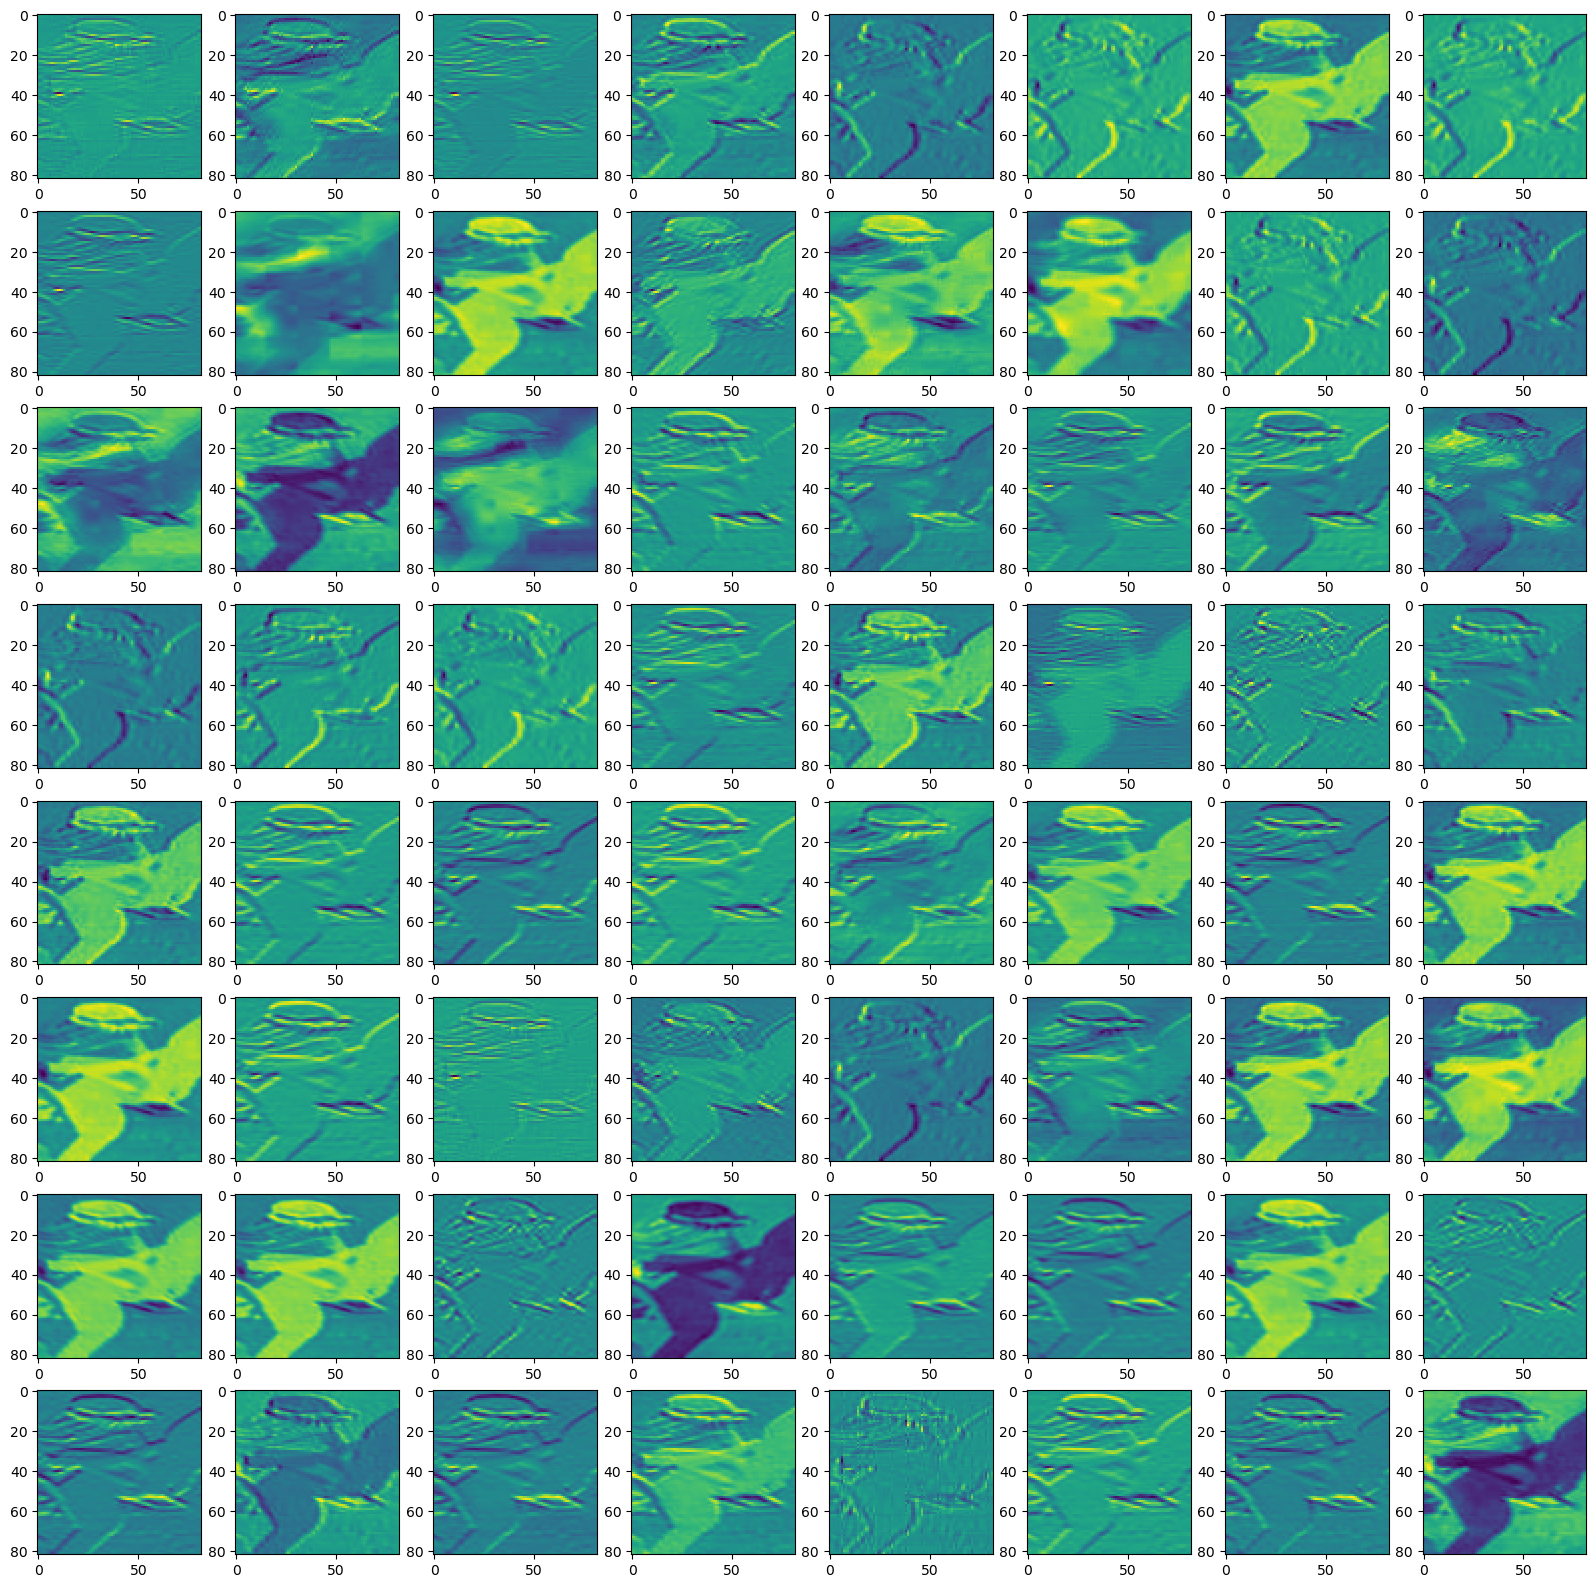

Layer  2
64
1.image


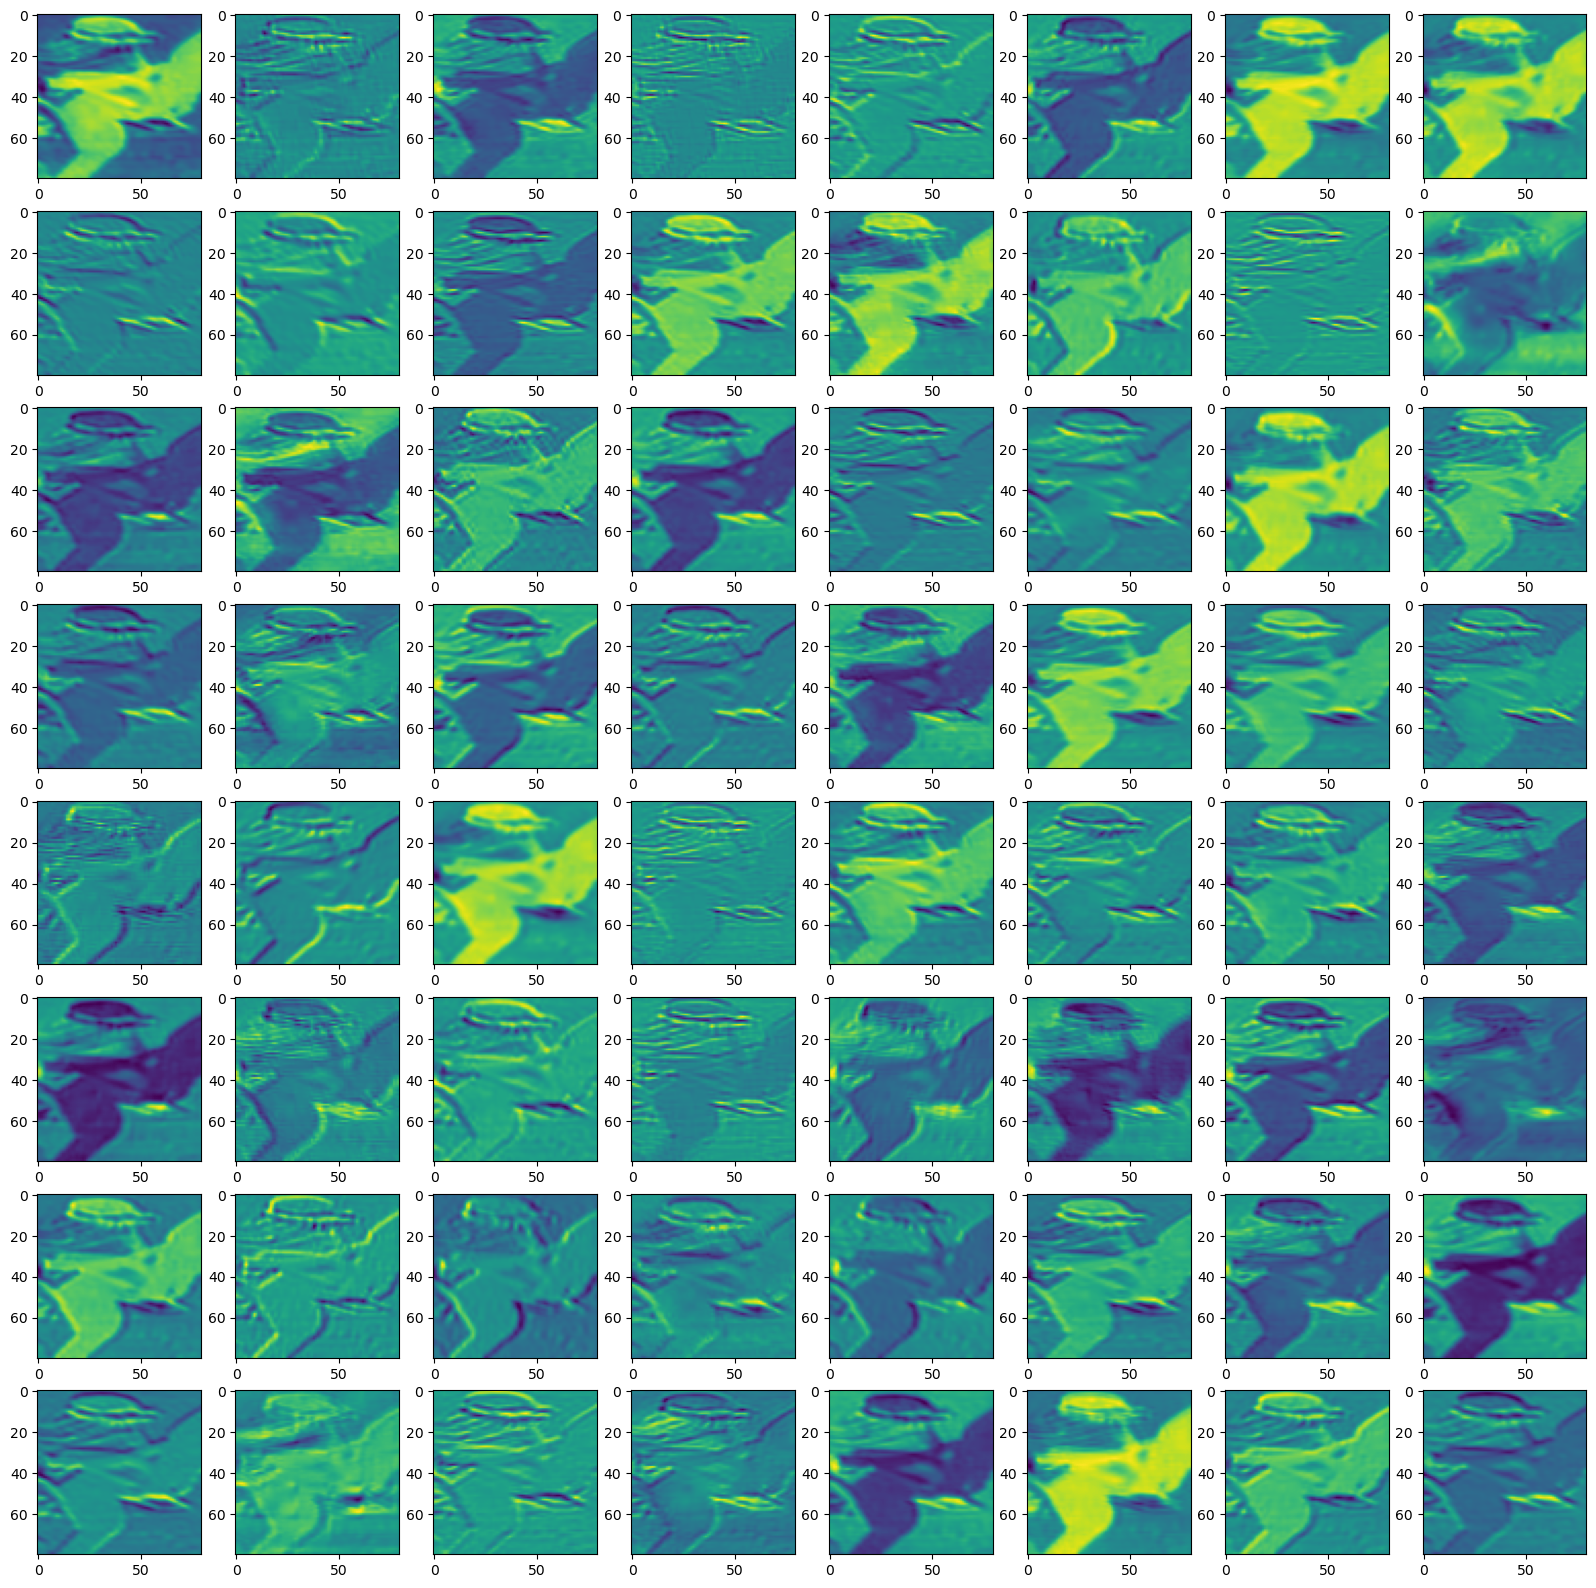

Layer  3
64
1.image


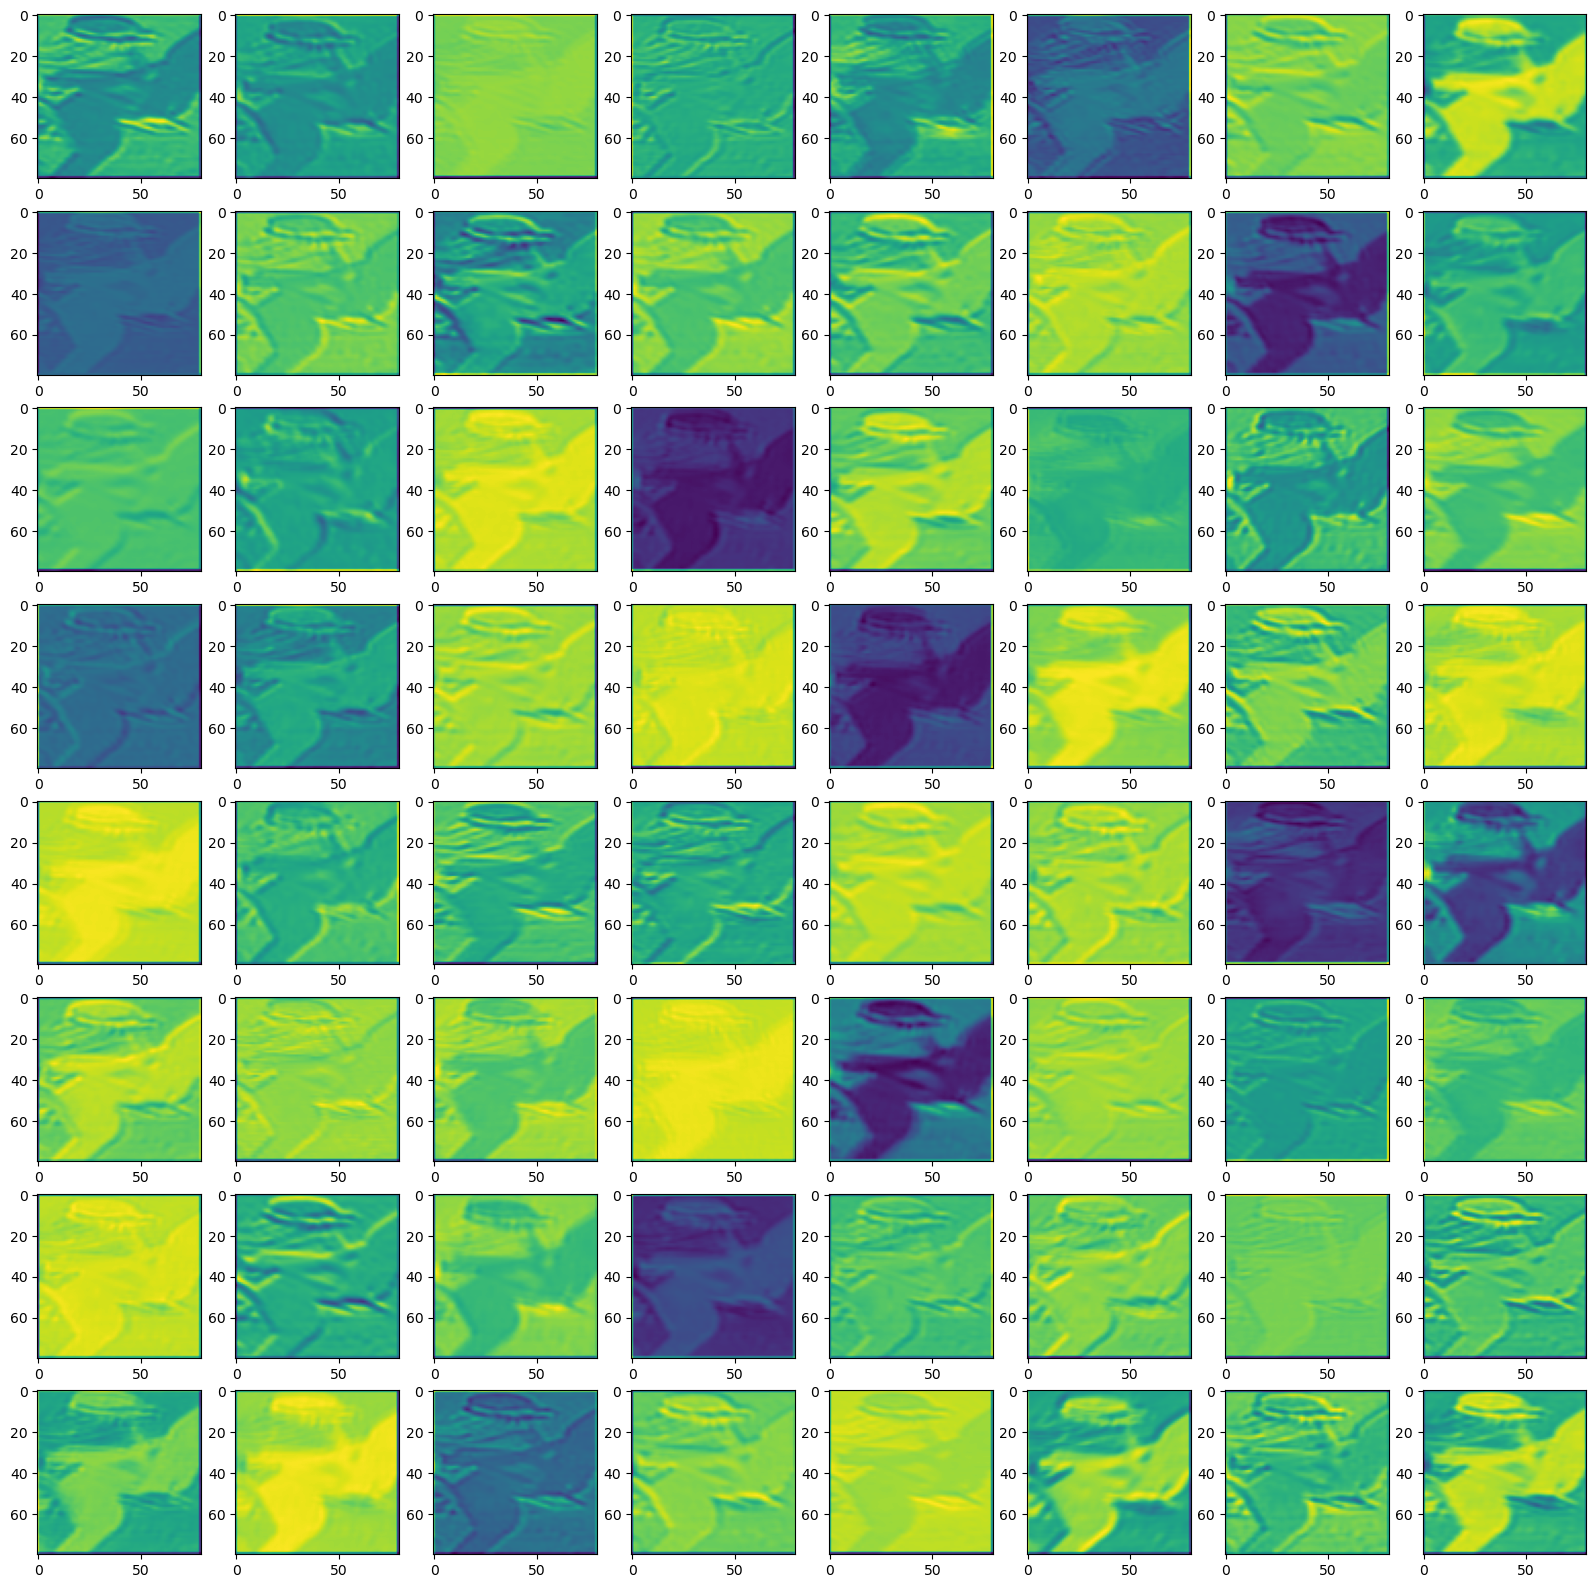

Layer  4
64
1.image


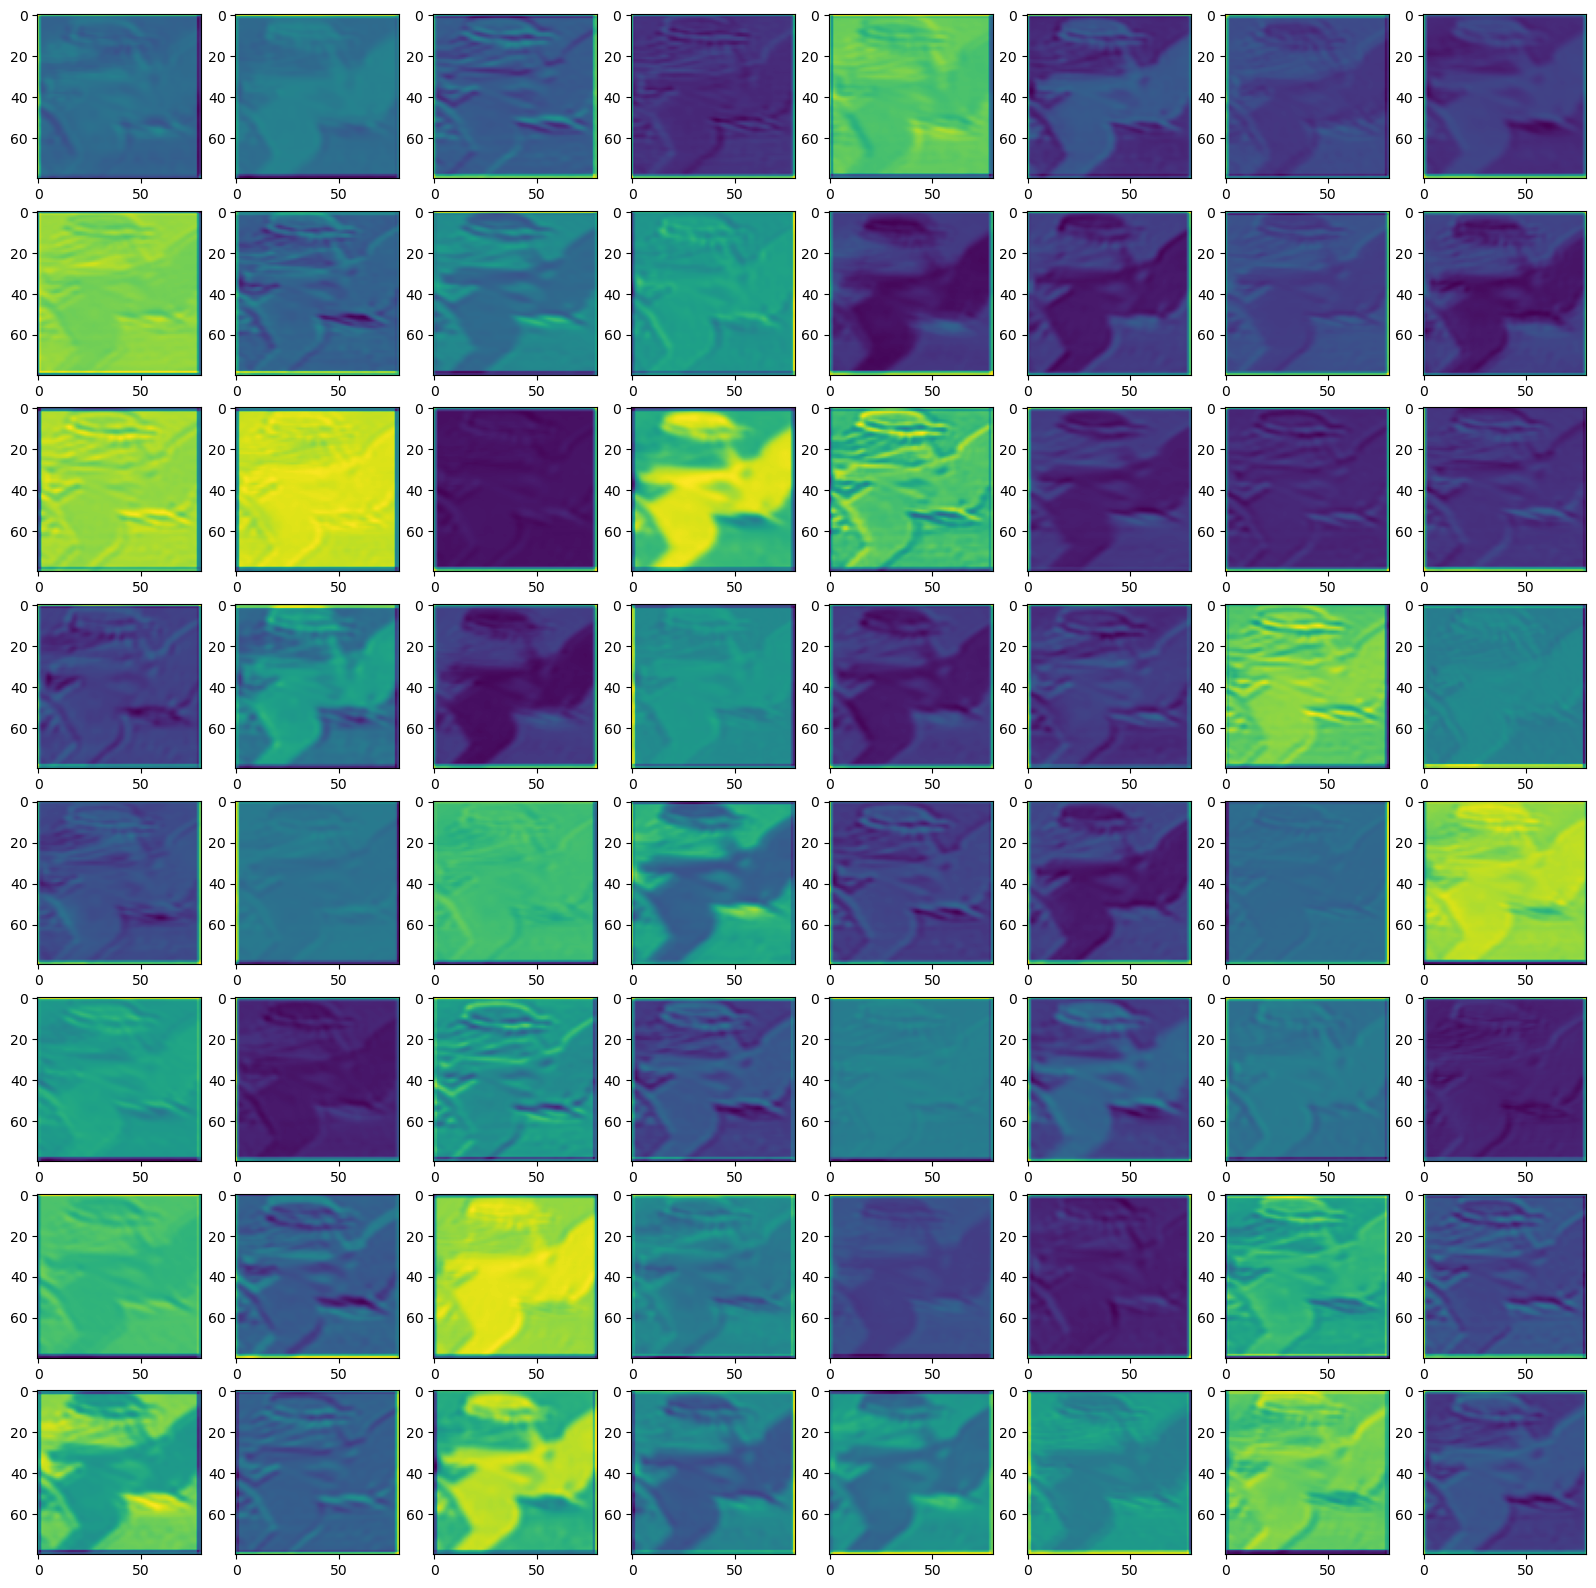

In [9]:
for num_layer in range(len(outputs)):
    layer_viz = outputs[num_layer].tolist()
    print("Layer ",num_layer+1)
    nth=1
    for filters in layer_viz:
        print(len(filters))
        plt.figure(figsize=(20,20))
        for i,filter_map in enumerate(filters):
            plt.subplot(8,8,i+1)
            plt.imshow(filter_map)
        print(str(nth)+".image")
        plt.show()
        nth+=1
